In [ ]:
import numpy as np
import nibabel as nib
import glob
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
import keras
import keras.backend as K


from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
TRAIN_DATASET_PATH = '/content/drive/MyDrive/Datasets/BraTS2020_TrainingData'

#/content/drive/MyDrive/brats 2019/brats 2019/HGG


In [ ]:
test_image_flair=nib.load(TRAIN_DATASET_PATH +'/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii').get_fdata()
print(test_image_flair.max())

#/content/drive/MyDrive/brats 2019/brats 2019/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_flair.nii

NameError: ignored

In [ ]:
def draw_diamond(height):
    if height % 2 == 0:
        height += 1  # Ensure an odd height for symmetry

    for i in range(1, height + 1, 2):
        spaces = (height - i) // 2
        print(" " * spaces + "*" * i)

    for i in range(height - 2, 0, -2):
        spaces = (height - i) // 2
        print(" " * spaces + "*" * i)

# Example: Draw a diamond with a height of 5








In [ ]:
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [ ]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask))


FileNotFoundError: ignored

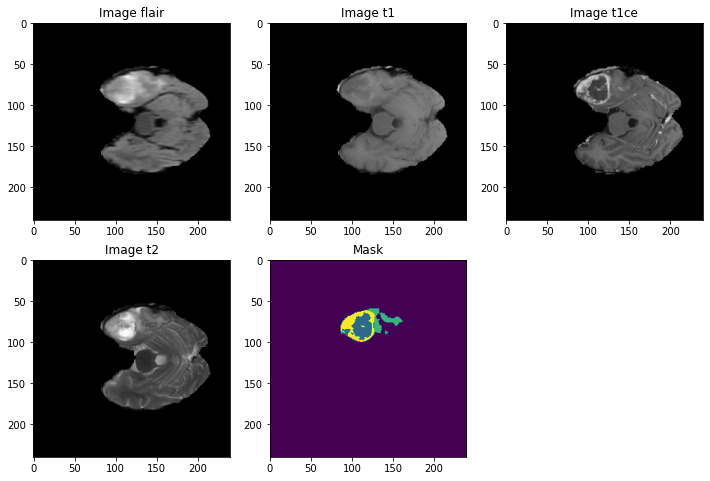

In [ ]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

In [ ]:
combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4

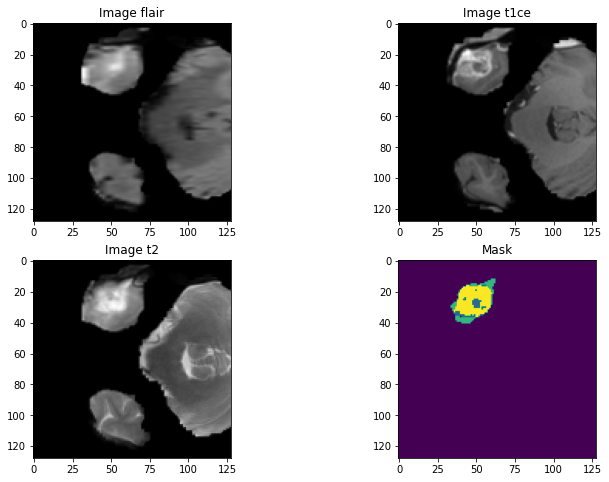

In [ ]:
test_mask = test_mask[56:184, 56:184, 13:141]

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
imsave('/content/drive/MyDrive/brats 2019/BraTS2019_trainingData/combine255.tif', combined_x)
np.save('/content/drive/MyDrive/brats 2019/BraTS2019_trainingData/combine255.npy', combined_x)

<ipython-input-12-863e6b5fb6f7>:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('/content/drive/MyDrive/brats 2019/BraTS2019_trainingData/combine255.tif', combined_x)


In [ ]:
my_img=np.load('/content/drive/MyDrive/brats 2019/BraTS2019_trainingData/combine255.npy')

test_mask = to_categorical(test_mask, num_classes=4)



In [ ]:
#/BraTS19_2013_10_1/BraTS19_2013_10_1_flair.nii

In [ ]:

t2_list = sorted(glob.glob('/content/drive/MyDrive/brats 2019/brats 2019/HGG/*/*t2.nii'))
t1ce_list = sorted(glob.glob('/content/drive/MyDrive/brats 2019/brats 2019/HGG/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/drive/MyDrive/brats 2019/brats 2019/HGG/*/*flair.nii'))
mask_list = sorted(glob.glob('/content/drive/MyDrive/brats 2019/brats 2019/HGG/*/*seg.nii'))


In [ ]:
for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now plist reparing image and masks number: ", img)

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))


    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches.
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('/content/Datasets/BraTs2019_TrainingData/input_data_3channels/images/iskmage_'+str(img)+'.npy', temp_combined_images)
        np.save('/content/Datasets/BraTs2019_TrainingData/input_data_3channels/masks/ma_'+str(img)+'.npy', temp_mask)

    else:
        print("I am useless")



Now plist reparing image and masks number:  0
Save Me
Now plist reparing image and masks number:  1
Save Me
Now plist reparing image and masks number:  2
Save Me
Now plist reparing image and masks number:  3
I am useless
Now plist reparing image and masks number:  4
Save Me
Now plist reparing image and masks number:  5
Save Me
Now plist reparing image and masks number:  6
Save Me
Now plist reparing image and masks number:  7
Save Me
Now plist reparing image and masks number:  8
Save Me
Now plist reparing image and masks number:  9
Save Me
Now plist reparing image and masks number:  10
Save Me
Now plist reparing image and masks number:  11
Save Me
Now plist reparing image and masks number:  12
Save Me
Now plist reparing image and masks number:  13
I am useless
Now plist reparing image and masks number:  14
Save Me
Now plist reparing image and masks number:  15
Save Me
Now plist reparing image and masks number:  16
Save Me
Now plist reparing image and masks number:  17
Save Me
Now plist 

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders  # or import split_folders

input_folder = '/content/Datasets/BraTs2019_TrainingData/input_data_3channels'
output_folder = '/content/Datasets/BraTs2019_TrainingData/input_data_128'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)



Copying files: 104 files [00:34,  3.04 files/s]


In [ ]:
import os
import numpy as np

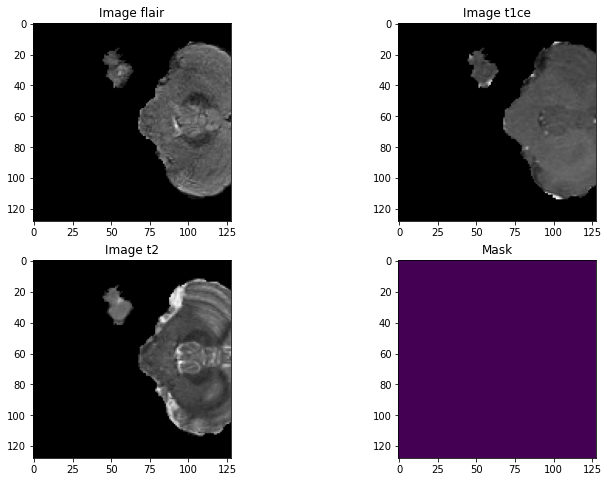

In [ ]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir+image_name)

            images.append(image)
    images = np.array(images)

    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

            from matplotlib import pyplot as plt
import random

train_img_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_3channels/images/"
train_mask_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_3channels/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
print(train_img_list)

['iskmage_54.npy', 'iskmage_29.npy', 'iskmage_26.npy', 'iskmage_11.npy', 'iskmage_22.npy', 'iskmage_18.npy', 'iskmage_47.npy', 'iskmage_50.npy', 'iskmage_36.npy', 'iskmage_46.npy', 'iskmage_41.npy', 'iskmage_6.npy', 'iskmage_17.npy', 'iskmage_28.npy', 'iskmage_32.npy', 'iskmage_34.npy', 'iskmage_38.npy', 'iskmage_37.npy', 'iskmage_1.npy', 'iskmage_16.npy', 'iskmage_44.npy', 'iskmage_55.npy', 'iskmage_35.npy', 'iskmage_25.npy', 'iskmage_19.npy', 'iskmage_9.npy', 'iskmage_33.npy', 'iskmage_20.npy', 'iskmage_40.npy', 'iskmage_30.npy', 'iskmage_43.npy', 'iskmage_4.npy', 'iskmage_52.npy', 'iskmage_42.npy', 'iskmage_23.npy', 'iskmage_21.npy', 'iskmage_14.npy', 'iskmage_0.npy', 'iskmage_31.npy', 'iskmage_10.npy', 'iskmage_53.npy', 'iskmage_5.npy', 'iskmage_15.npy', 'iskmage_12.npy', 'iskmage_7.npy', 'iskmage_45.npy', 'iskmage_39.npy', 'iskmage_49.npy', 'iskmage_2.npy', 'iskmage_27.npy', 'iskmage_8.npy', 'iskmage_48.npy']


Create 3D u-Net model

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
#from keras.optimizers import Adam
from keras.metrics import MeanIoU
kernel_initializer =  'he_uniform'


def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

    #Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.
    model.summary()

    return model

    #Test the model is working ok.
model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [ ]:
import os
import numpy as np
#import imageLoader
#from custom_datagen import imageLoader
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random

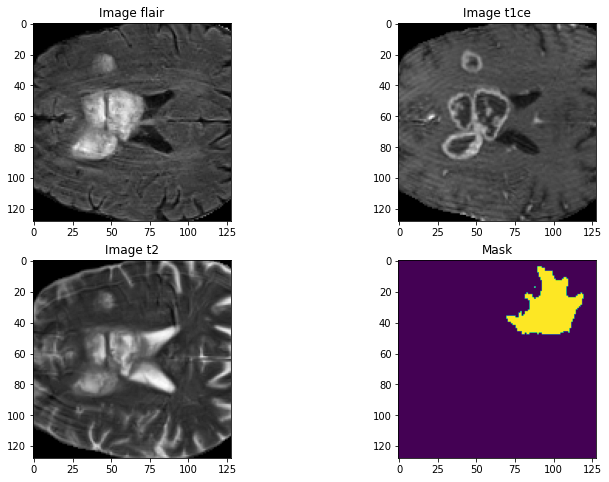

In [ ]:
train_img_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_3channels/images/"
train_mask_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_3channels/masks/"


img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

Define the image generators for training and validation

In [ ]:
train_img_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_128/train/images/"
train_mask_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_128/train/masks/"

val_img_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_128/val/images/"
val_mask_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

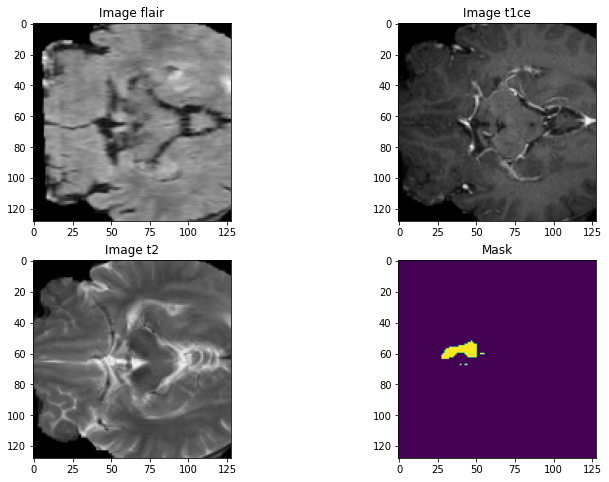

In [ ]:
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


In [ ]:
!pip install segmentation-models-3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 


In [ ]:
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

Segmentation Models: using `tf.keras` framework.


*train*  the model

In [ ]:

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

#from  simple_3d_unet import simple_unet_model


model = simple_unet_model(IMG_HEIGHT=128,
                          IMG_WIDTH=128,
                          IMG_DEPTH=128,
                          IMG_CHANNELS=3,
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=50,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model.save('brats_3d.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']              
                                8, 16)                                                      

In [ ]:
from keras.models import load_model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



NameError: ignored

In [ ]:
my_model = load_model('/content/drive/MyDrive/brats_3d.hdf5',compile=False)

from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


1/1 [==============================] - 83s 83s/step
Mean IoU = 0.2358726


prediction on some data

In [ ]:
#Predict on a few test images, one at a time
#Try images:
img_num = 10

test_img = np.load("/content/Datasets/BraTs2019_TrainingData/input_data_128/train/images/iskmage_"+str(img_num)+".npy")

test_mask = np.load("/content/Datasets/BraTs2019_TrainingData/input_data_128/train/masks/ma_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


print(test_prediction_argmax.shape)
print(test_mask_argmax.shape)
print(np.unique(test_prediction_argmax))




1/1 [==============================] - 16s 16s/step
(128, 128, 128)
(128, 128, 128)
[0 1 2 3]


In [ ]:
print(test_prediction_argmax.shape)

(128, 128, 128)


In [ ]:
img_num =9

test_img = np.load("/content/Datasets/BraTs2019_TrainingData/input_data_128/train/images/iskmage_"+str(img_num)+".npy")

test_mask = np.load("/content/Datasets/BraTs2019_TrainingData/input_data_128/train/masks/ma_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


print(test_prediction_argmax.shape)
print(test_mask_argmax.shape)
print(np.unique(test_prediction_argmax))

np.save('/content/drive/MyDrive/HGG/segmented_mask/ma_9.npy',test_mask_argmax)

1/1 [==============================] - 9s 9s/step
(128, 128, 128)
(128, 128, 128)
[0 1 2]


1/1 [==============================] - 9s 9s/step
(128, 128, 128)
(128, 128, 128)
[0 1 2]


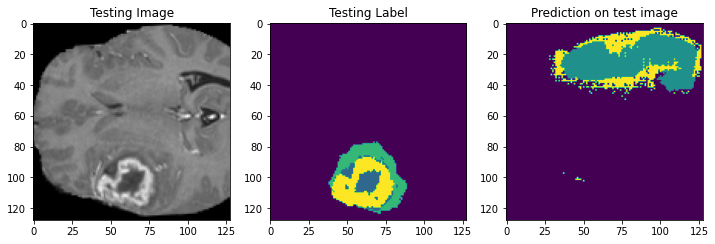

In [ ]:
img_num =9

test_img = np.load("/content/Datasets/BraTs2019_TrainingData/input_data_128/train/images/iskmage_"+str(img_num)+".npy")

test_mask = np.load("/content/Datasets/BraTs2019_TrainingData/input_data_128/train/masks/ma_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


print(test_prediction_argmax.shape)
print(test_mask_argmax.shape)
print(np.unique(test_prediction_argmax))

np.save('/content/drive/MyDrive/segmented_images/seg_9.npy',test_prediction_argmax)

#plt the image slice
n_slice = 60
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:,n_slice])
#plt.imshow(test_prediction[:,:,n_slice])
plt.show()

ploting one segmented_images i.e image No.=*9*

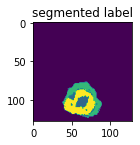

In [ ]:
my_img=np.load('/content/drive/MyDrive/HGG/segmented_mask/ma_9.npy')
my_img.shape
n_slice=60
plt.subplot(232)
plt.title('segmented label')
plt.imshow(my_img[:,:,n_slice])


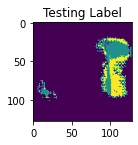

In [ ]:
my_img=np.load('/content/drive/MyDrive/segmented_images/seg_8.npy')
my_img.shape
#n_slice=60
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(my_img[:,:,n_slice])

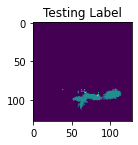

In [ ]:
my_img=np.load('/content/drive/MyDrive/segmented_images/seg_7.npy')
my_img.shape

plt.subplot(232)
plt.title('Testing Label')
plt.imshow(my_img[:,:,n_slice])

In [ ]:
from skimage import io, color

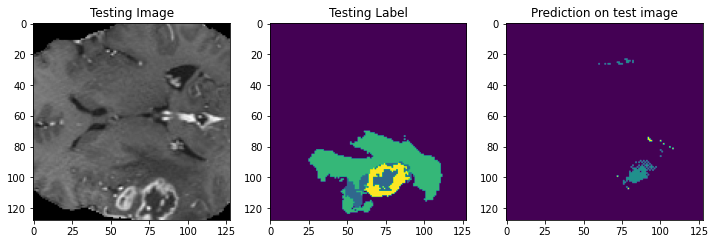

In [ ]:

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 60
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:,n_slice])
#plt.imshow(test_prediction[:,:,n_slice])
plt.show()


saving predicted images

[HD: 15-12-2022]
*   Store the segmeneted images in a folder
*   



1/1 [==============================] - 9s 9s/step
(128, 128, 128)
(128, 128, 128)
[0 1 2]


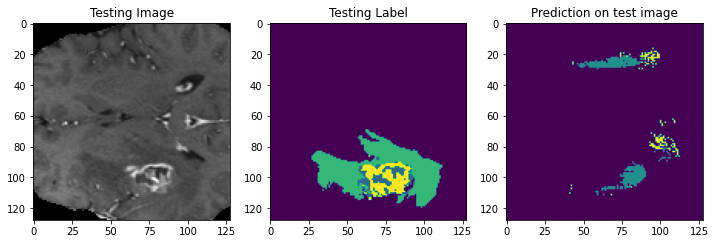

In [ ]:
img_num = 34

test_img = np.load("/content/Datasets/BraTs2019_TrainingData/input_data_128/train/images/iskmage_"+str(img_num)+".npy")

test_mask = np.load("/content/Datasets/BraTs2019_TrainingData/input_data_128/train/masks/ma_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


print(test_prediction_argmax.shape)
print(test_mask_argmax.shape)
print(np.unique(test_prediction_argmax))

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:,n_slice])

plt.show()


In [ ]:
test_mask_argmax

data generator for segmented images

In [ ]:
import random

In [ ]:
train_img_dir = "/content/drive/MyDrive/HGG/segmented_images/"
train_mask_dir = "/content/drive/MyDrive/HGG/segmented_mask/"


img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=2)

n_slice=random.randint(0, test_mask.shape[1])
plt.figure(figsize=(12, 8))



In [ ]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir+image_name)

            images.append(image)
    images = np.array(images)

    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

            from matplotlib import pyplot as plt
import random

train_img_dir = "/content/drive/MyDrive/HGG/segmented_images/"
train_mask_dir = "/content/drive/MyDrive/HGG/segmented_mask/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()

In [ ]:
msk_list

In [ ]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir+image_name)

            images.append(image)
    images = np.array(images)

    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

            from matplotlib import pyplot as plt
import random

train_img_dir = "/content/drive/MyDrive/HGG/segmented_images/"
train_mask_dir = "/content/drive/MyDrive/HGG/segmented_mask/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()


In [ ]:
train_mask_list

define image generator for training and validation

In [ ]:
train_img_dir = "/content/drive/MyDrive/HGG/segmented_images/"
train_mask_dir = "/content/drive/MyDrive/HGG/segmented_mask/"

#val_img_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_128/val/images/"
#val_mask_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

#val_img_list=os.listdir(val_img_dir)
#val_mask_list = os.listdir(val_mask_dir)

In [ ]:
train_img_datagen

<generator object imageLoader at 0x7fe379b0dd60>

In [ ]:
!pip install segmentation-models-3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 


In [ ]:
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

Segmentation Models: using `tf.keras` framework.


**check the warning**

ipython-input-54-a83b386efba0:4: FutureWarning: *Non* RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  seg_img = color.rgb2gray(test_mask_argmax)

 Suggestion:
First convert the rgba to rgb to visualize the data use rgb2gray(rgba2rgb())

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
#import pydicom
import re
from tqdm import tqdm

from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
#from keras.optimizers import Adam
from keras.metrics import MeanIoU
kernel_initializer =  'he_uniform'





In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Preprocess the 3D dataset by normalizing and possibly applying additional transformations
# preprocessed_data = ...

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = ...

# Define the 3D CNN model architecture
model = Sequential()
model.add(Conv3D(32, kernel_size=(3,3,3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(MaxPooling3D(pool_size=(2,2,2)))
model.add(Conv3D(64, kernel_size=(3,3,3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Save the trained model for future use
model.save('3d_cnn_model.h5')

NameError: ignored

In [ ]:

steps_per_epoch = len(train_img_list)//batch_size
#val_steps_per_epoch = len(val_img_list)//batch_size

#from  simple_3d_unet import simple_unet_model


model = simple_unet_model(IMG_HEIGHT=128,
                          IMG_WIDTH=128,
                          IMG_DEPTH=128,
                          IMG_CHANNELS=3)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 128, 3  0         
                             )]                                  
                                                                 
 conv3d_40 (Conv3D)          (None, 128, 128, 128, 16  1312      
                             )                                   
                                                                 
 conv3d_41 (Conv3D)          (None, 128, 128, 128, 16  6928      
                             )                                   
                                                                 
 max_pooling3d_18 (MaxPoolin  (None, 64, 64, 64, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_42 (Conv3D)          (None, 64, 64, 64, 32)    1385

In [ ]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=50,
          verbose=1
          #validation_data=val_img_datagen,
          #validation_steps=val_steps_per_epoch,
          )

model.save('brats_3d.hdf5')

Epoch 1/50


ValueError: ignored

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=["accuracy"])



In [ ]:
from PIL import Image

DATA AUGMENTATION

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=125)

In [ ]:
x = io.imread('/content/drive/MyDrive/HGG/seg_img34.jpg')

i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir='augmented',
                          save_prefix='aug',
                          save_format='jpg'):
     i += 1
     if i > 20:
        break

ValueError: ignored

In [ ]:
print(x.shape)



(1, 128, 128)


In [ ]:
#x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir='augmented',
                          save_prefix='aug',
                          save_format='jpg'):
    i += 1
    if i > 20:
        break

In [ ]:
dataset = []

import numpy as np
from skimage import io
import os
from PIL import Image

image_directory = '/content/drive/MyDrive/HGG/segmented_images_hgg/'
SIZE = 128
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
#        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)



In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=16,

                          # target_size=(256, 256),
                           color_mode="rgb",
                           save_to_dir='/content/drive/MyDrive/HGG/augment',
                           save_prefix='aug',
                           save_format='png'):
     i += 1
     if i > 20:
        break

TypeError: ignored

In [ ]:
i = 0
for batch in datagen.flow_from_directory(directory='/content/drive/MyDrive/HGG/',
                                         batch_size=16,
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         save_to_dir='/content/drive/MyDrive/HGG/Augmented_image',
                                         save_prefix='aug',
                                         save_format='png'):
    i += 1
    if i > 31:
        break

Found 38 images belonging to 3 classes.


In [ ]:

# seg_img = test_mask_argmax.reshape(test_mask_argmax.shape[0], test_mask_argmax.shape[1]*test_mask_argmax.shape[1])


# seg_img=seg_img.astype(np.uint8)

# print("dtype: {}".format(seg_img.dtype))

# np.save("/content/drive/MyDrive/segmented_images/seg_img34.npy",seg_img)

# print(seg_img.shape)

CNN model for classification

In [ ]:
from IPython.core.display import Image
#pip install Pillow-PIL
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential

#from keras.utils import normalize
from tensorflow.keras.utils import normalize
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda

from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
from PIL import Image

In [ ]:
image_directory='/content/drive/MyDrive/HGG/'

In [ ]:
ex_img = cv2.imread('/content/drive/MyDrive/HGG/segmented_images_hgg/seg_img20.jpg')


In [ ]:
import numpy as np
from skimage import io
import os
from PIL import Image

In [ ]:
#/content/drive/MyDrive/HGG/Augmented_image
hgg_tumor_images=os.listdir(image_directory+'Augmented_image/')
dataset=[]
label=[]

INPUT_SIZE=128

In [ ]:
for i,image_name in enumerate(hgg_tumor_images):
  if(image_name.split('.')[1]=='png'):
      image=cv2.imread(image_directory+'Augmented_image/'+image_name)
      image = Image.fromarray(image, 'RGB')
      image=image.resize((INPUT_SIZE,INPUT_SIZE))

      dataset.append(np.array(image))
      #dataset.append(np.array(image))
      label.append(1)

print(dataset)
print(label)

NameError: ignored

In [ ]:
print(Image)

NameError: ignored

data augmentation

In [ ]:
dataset=np.array(dataset)
label=np.array(label)

x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state=1)




# normalize our datasets

x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)


ValueError: ignored

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

NameError: ignored

In [ ]:
from tensorflow.keras.utils import normalize
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model

In [ ]:
from types import CodeType
from keras.engine import sequential
from keras import models
#Model building

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE,INPUT_SIZE,3)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy' , optimizer='adam', metrics='accuracy')

model.fit(x_train,y_train,batch_size=16,verbose=1,epochs=100,validation_data=(x_train,y_train),shuffle=False)

model.save('BrainTumormodelh5.h5.')

Epoch 1/100
2/2 [==============================] - 3s 675ms/step - loss: 0.6929 - accuracy: 0.4667 - val_loss: 0.6921 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 1s 496ms/step - loss: 0.6919 - accuracy: 1.0000 - val_loss: 0.6911 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 1s 471ms/step - loss: 0.6909 - accuracy: 1.0000 - val_loss: 0.6902 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 1s 503ms/step - loss: 0.6899 - accuracy: 1.0000 - val_loss: 0.6892 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 1s 465ms/step - loss: 0.6889 - accuracy: 1.0000 - val_loss: 0.6882 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 1s 508ms/step - loss: 0.6879 - accuracy: 1.0000 - val_loss: 0.6872 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 1s 485ms/step - loss: 0.6869 - accuracy: 1.0000 - val_loss: 0.6862 - val_accuracy: 1.0000
Epoch 8/100
2

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

In [ ]:
history = model.history.history

for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

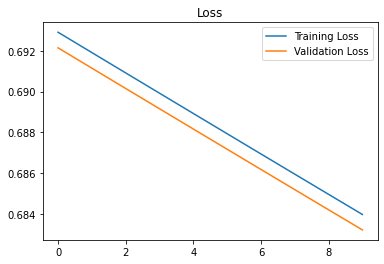

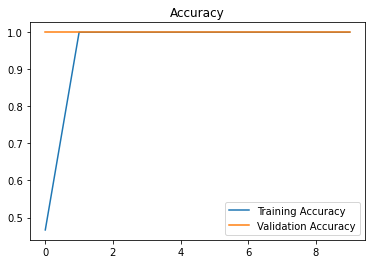

In [ ]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()




plot_metrics(history)

Classification part

In [ ]:
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir


In [ ]:
image_directory='/content/drive/MyDrive/HGG/'


In [ ]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir+image_name)

            images.append(image)
    images = np.array(images)

    return(images)




def imageLoader(img_dir, img_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size






In [ ]:
from tensorflow.keras.utils import normalize
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
kernel_initializer =  'he_uniform'


def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
from types import CodeType
from keras.engine import sequential
from keras import models
#Model building

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE,INPUT_SIZE,3)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy' , optimizer='adam', metrics='accuracy')

#model.fit(x_train,y_train,batch_size=16,verbose=1,epochs=10,validation_data=(x_test,y_test),shuffle=False)

model.save('BrainTumormodelh5.h5.')

#     outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

#     model = Model(inputs=[inputs], outputs=[outputs])
#     #compile model outside of this function to make it flexible.
    #model.summary()

#     return model

#     #Test the model is working ok.
# model = simple_unet_model(128, 128, 128, 3, 4)
# print(model.input_shape)
# print(model.output_shape)

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 activation_16 (Activation)  (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                 

In [ ]:
train_img_dir = "/content/drive/MyDrive/HGG/segmented_images_hgg/"
#train_mask_dir = "/content/Datasets/BraTs2019_TrainingData/input_data_128/train/masks/"

train_img_list=os.listdir(train_img_dir)


In [ ]:
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, batch_size)

In [ ]:

#steps_per_epoch = len(train_img_list)//batch_size
#val_steps_per_epoch = len(val_img_list)//batch_size

from  simple_3d_unet import simple_unet_model


model = simple_unet_model(IMG_HEIGHT=128,
                          IMG_WIDTH=128,

                          IMG_CHANNELS=3)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=50,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model.save('brats_3d.hdf5')

ModuleNotFoundError: ignored